<a href="https://colab.research.google.com/github/Chhavinder058/CAPSTONE/blob/main/Capstone_Data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Group 1**

##**Project**: Farming 2.0: IoT and Machine Learning Integration

##**Group_Members**
1. Chhavinder Singh
2. Gireeshma Yarradoddi
3. Osama Al Daqaq
4. Santhosh Gopi
5. Amandeep Kaur

In [22]:
#Importing all the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

#**Crop Dataset**

##**Exploratory Data Analysis**

In [3]:
crop_data = pd.read_csv('https://raw.githubusercontent.com/Chhavinder058/CAPSTONE/refs/heads/main/Crop.csv')  #Imported the dataset

**1. What are the dimensions of the dataset?**

In [24]:
crop_data.shape

(1697, 8)

In [25]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [26]:
crop_data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana
1696,80,71,47,27.505277,80.797840,6.156373,105.077699,banana


**2. What types of variables are present?**

In [31]:
crop_data.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [27]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


## **Data Quality and Integrity**

3. **Are there any missing values in the dataset?**
   - Which columns have missing values, and how many?

In [33]:
# Check for missing values in the dataset
missing_values = crop_data.isnull().sum() # Display columns with missing values and the count of missing values
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


4. **Are there any duplicated rows in the dataset?**
   - If so, how many?

In [34]:
# Check for duplicated rows in the dataset
duplicated_rows = crop_data.duplicated().sum()

# Display the number of duplicated rows
print(f"Number of duplicated rows: {duplicated_rows}")

Number of duplicated rows: 103


In [35]:
# Remove duplicated rows
data_cleaned = crop_data.drop_duplicates()

# Check for duplicated rows after removal
print(f"Number of duplicated rows after removal: {data_cleaned.duplicated().sum()}")

# Display the new shape of the dataset
print(f"Dataset dimensions after removing duplicates: {data_cleaned.shape}")


Number of duplicated rows after removal: 0
Dataset dimensions after removing duplicates: (1594, 8)


**5. What is the summary statistics of the numerical features?**

In [36]:
data_cleaned.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000
mean,53.157465,58.504391,53.709536,24.690410,65.732970,6.441559,99.504943
std,38.358024,34.568313,58.362368,4.953632,24.212157,0.883872,51.474777
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,22.000000,36.000000,20.000000,21.588696,51.263068,5.864478,66.833034
50%,37.000000,53.500000,29.000000,24.882009,77.362465,6.355057,91.905004
75%,90.000000,72.000000,52.000000,27.776905,83.694175,6.932689,115.377537
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


**6. What is the distribution of each numerical feature?**

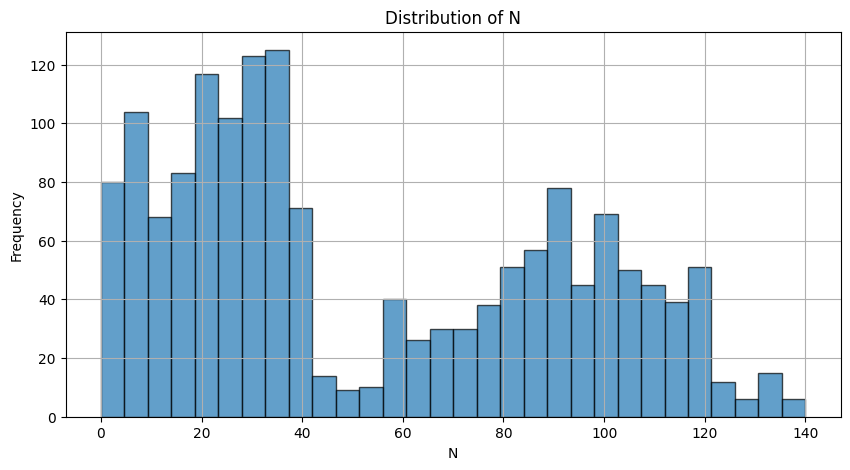

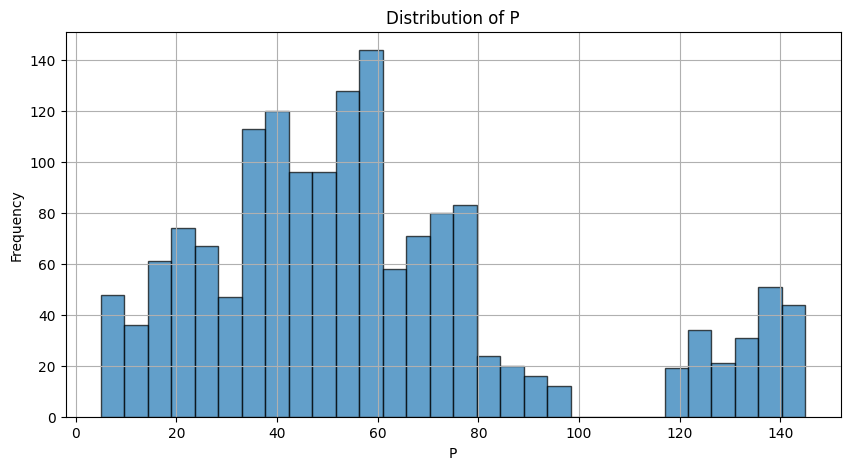

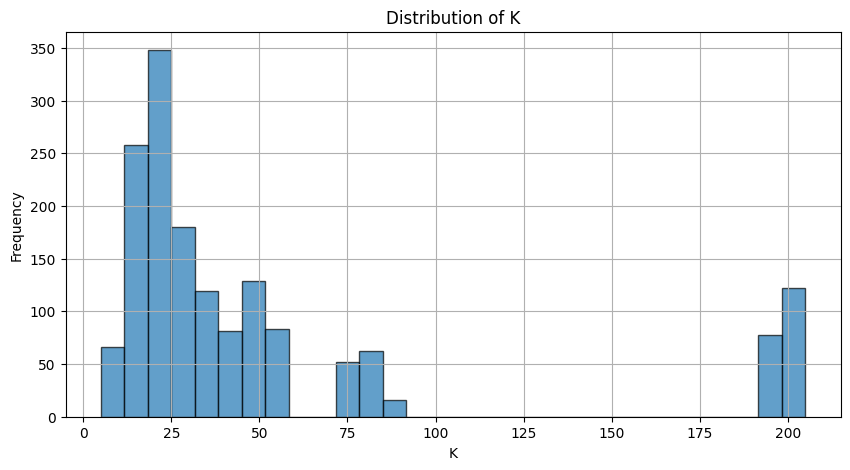

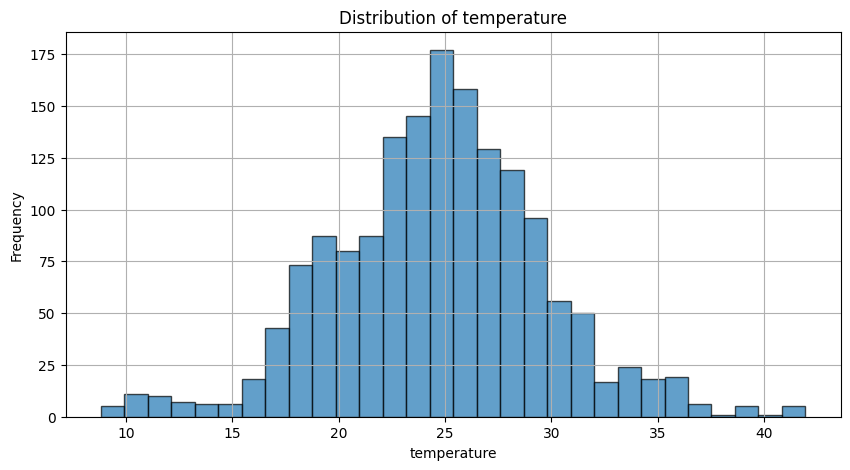

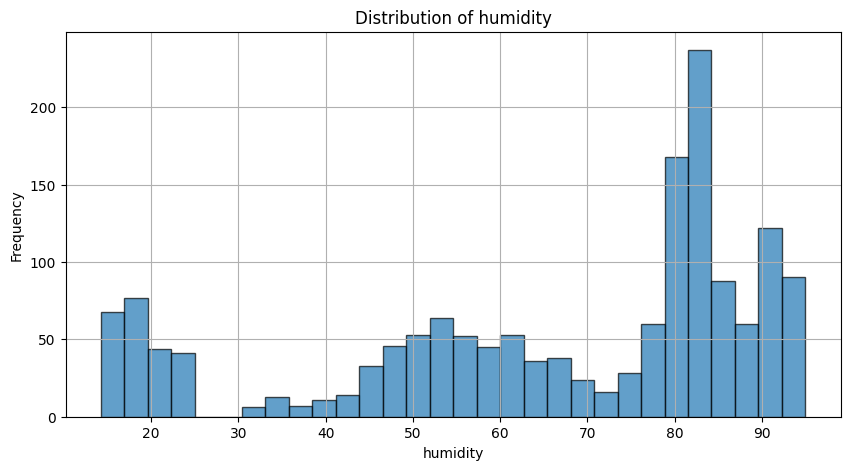

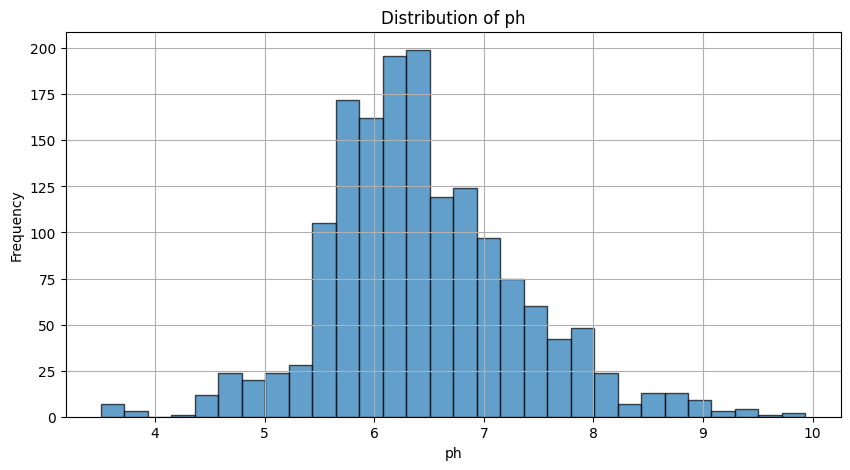

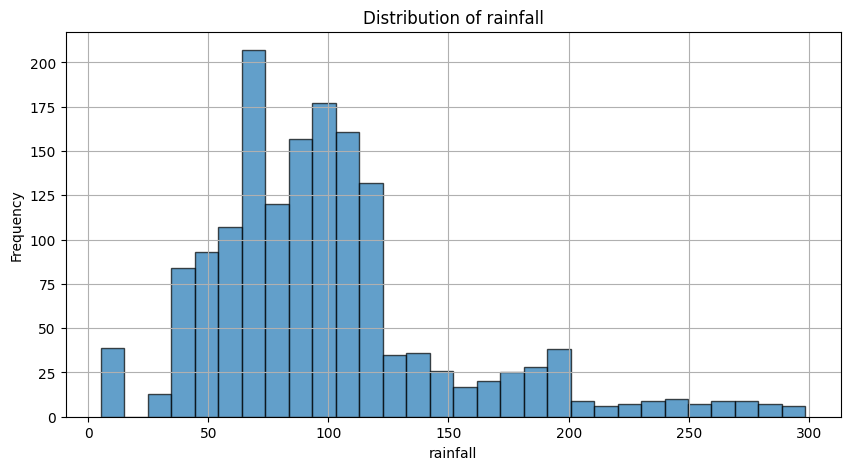

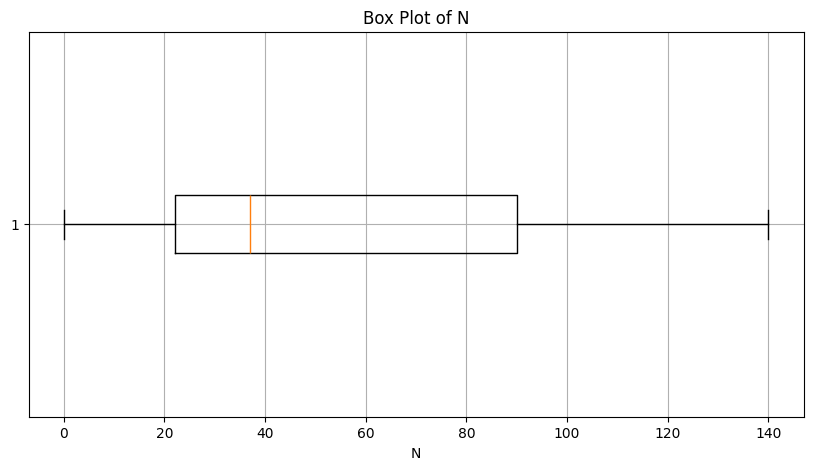

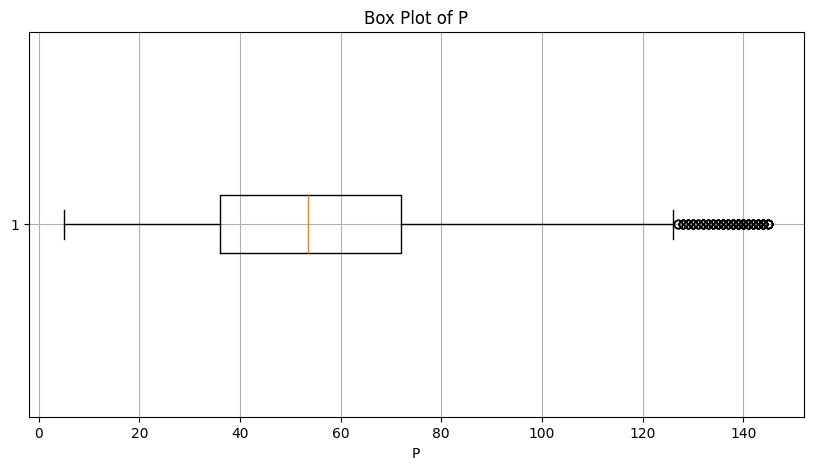

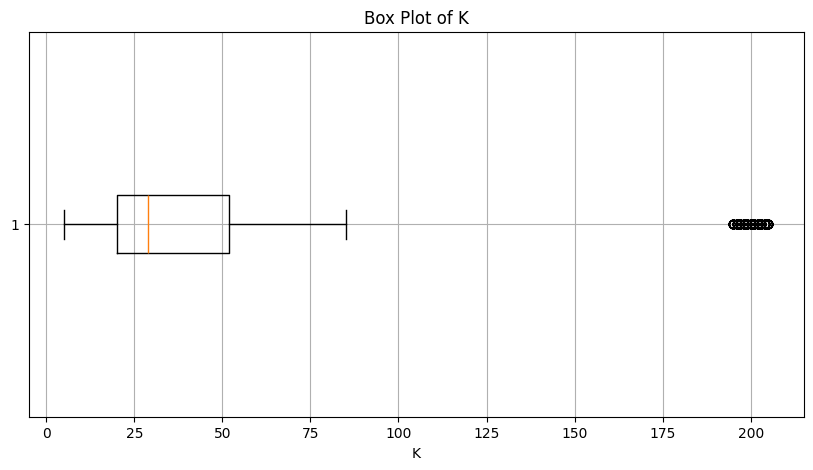

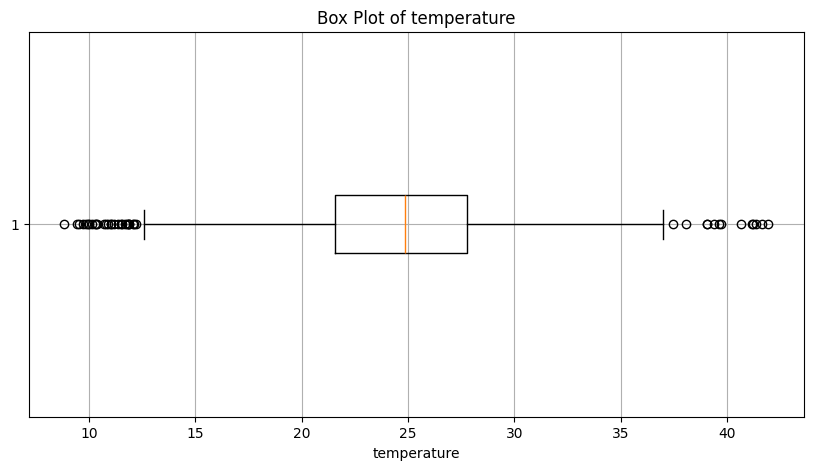

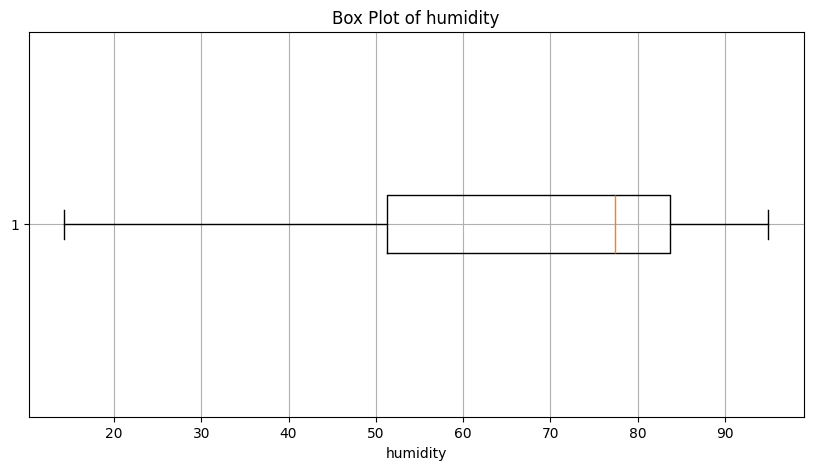

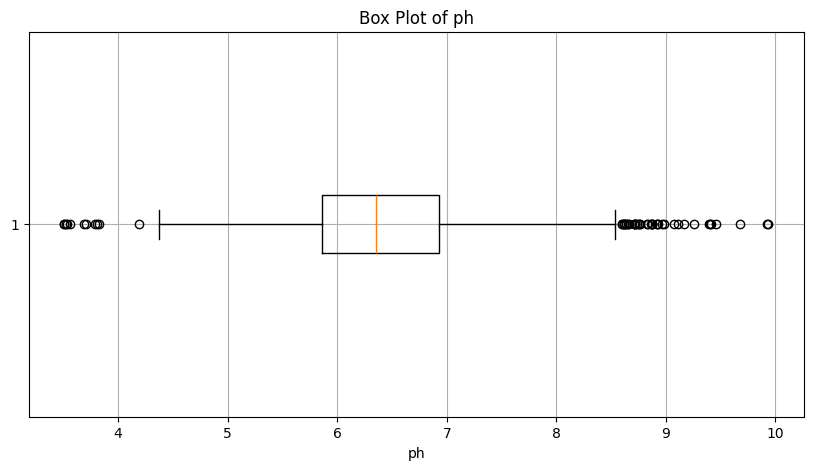

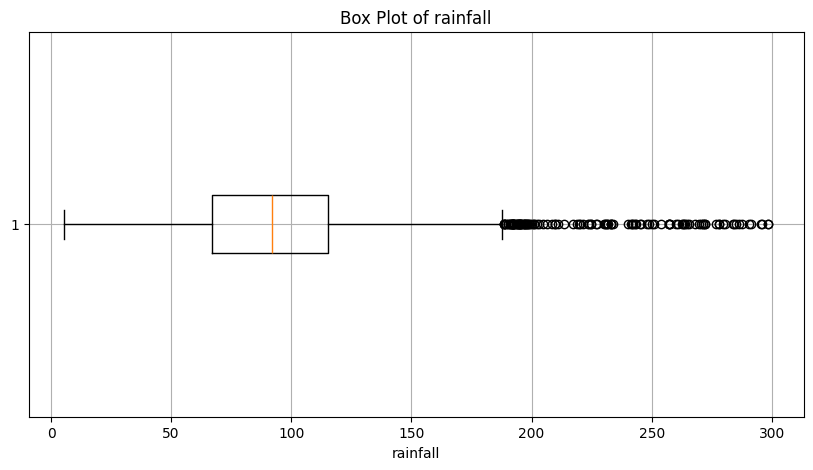

In [38]:
# Identify numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each numerical feature
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.hist(data_cleaned[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot box plots for each numerical feature
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(data_cleaned[col], vert=False)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


**7. How do the distributions of numerical features vary across different classes?**

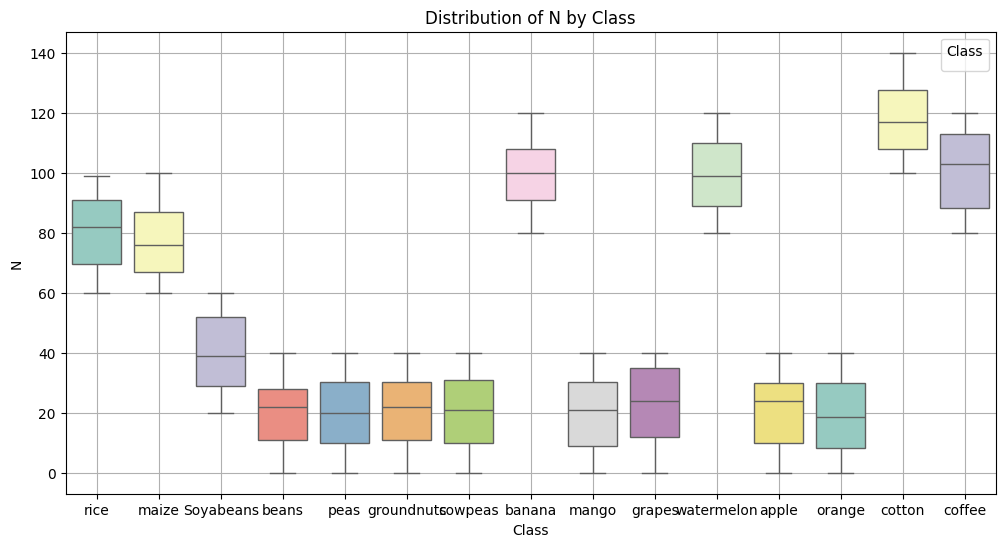

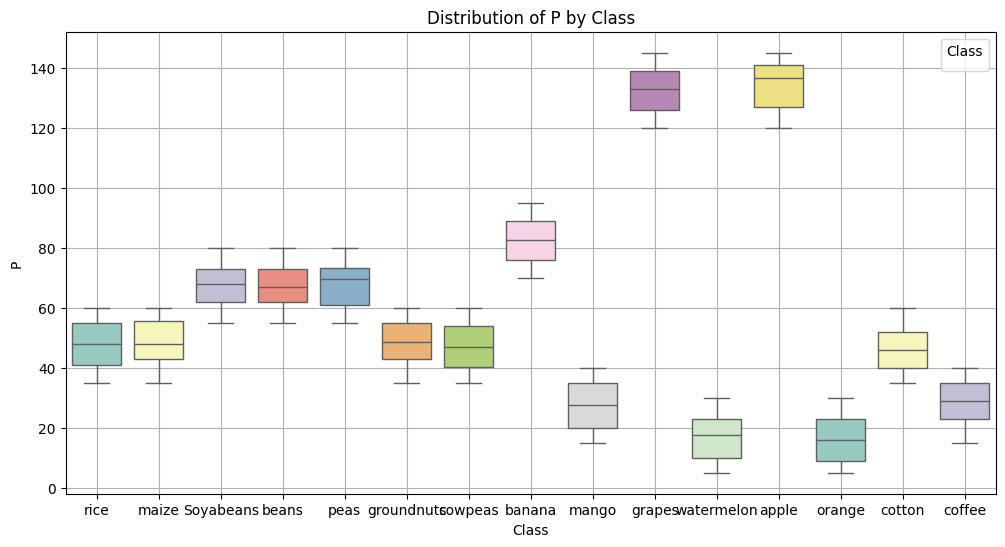

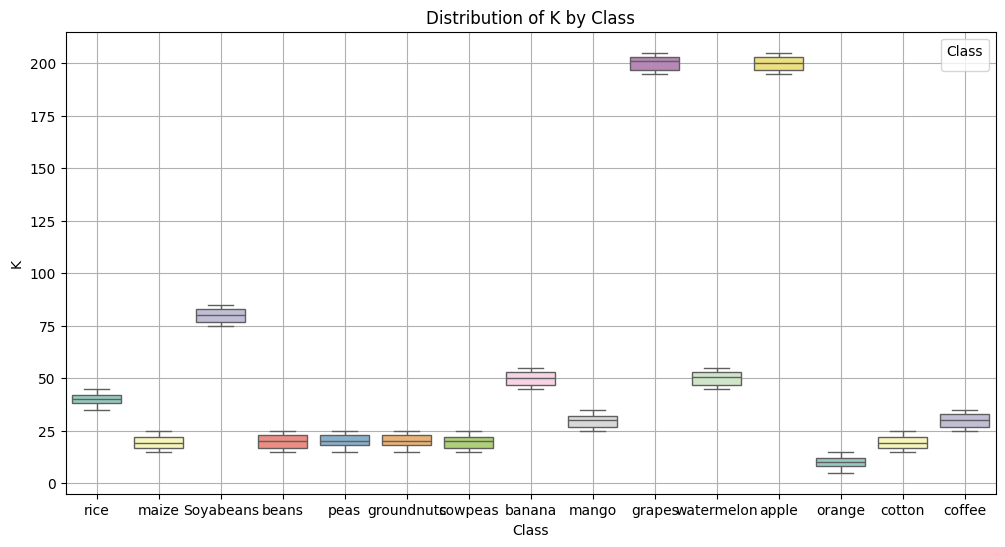

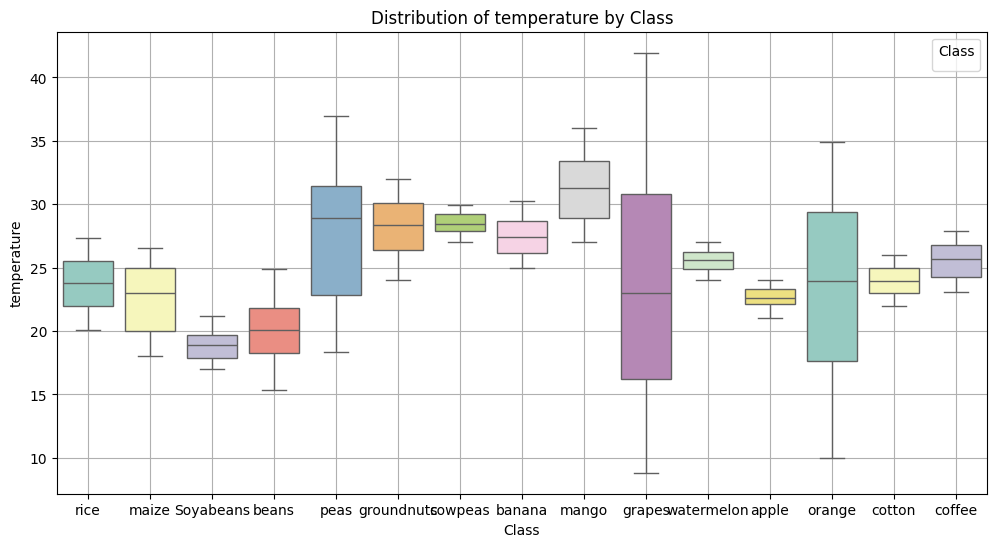

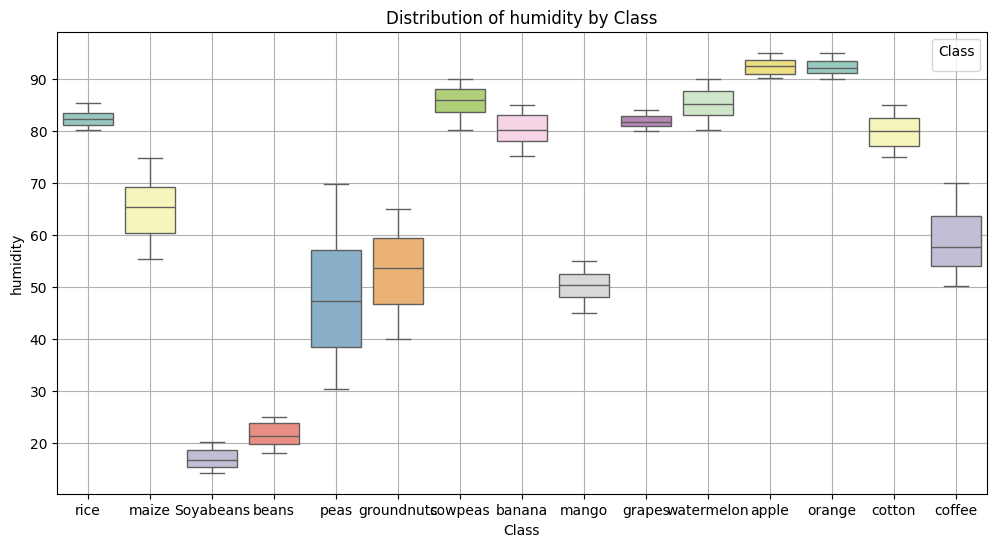

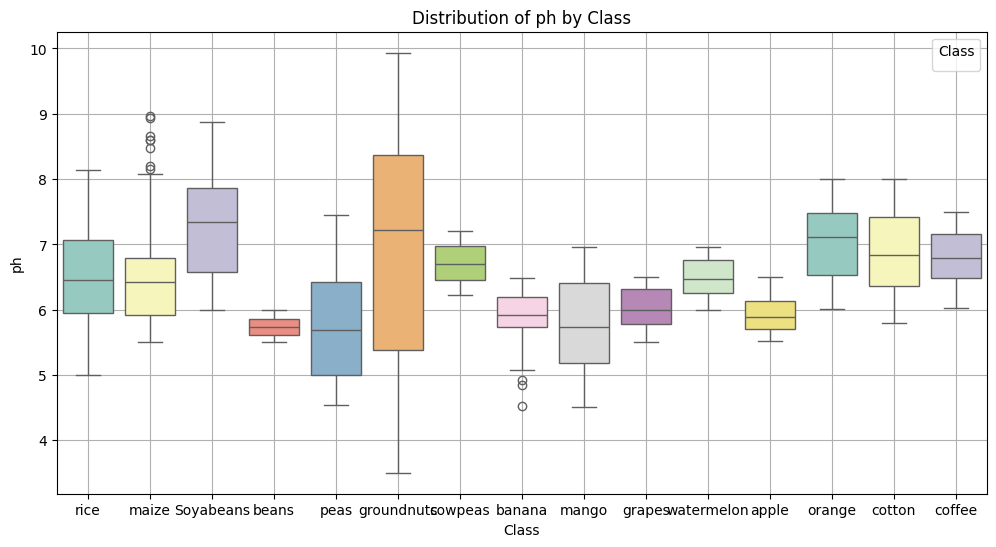

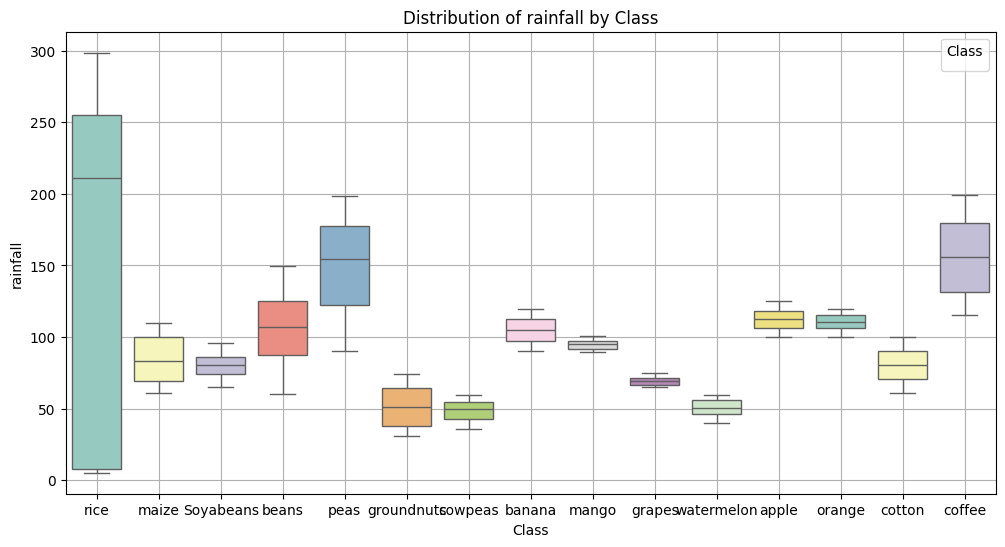

In [41]:
# Identify numerical columns and the class column
class_column = 'label'
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each numerical feature grouped by class
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=class_column, y=col, data=data, palette="Set3")
    plt.title(f'Distribution of {col} by Class')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.legend(title='Class', loc='upper right')
    plt.grid(True)
    plt.show()

## Categorical Data Analysis
**8. What are the unique categories in each categorical feature?**

In [42]:
# Identify categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Display unique categories for each categorical feature
for col in categorical_columns:
    unique_categories = data_cleaned[col].unique()
    print(f"Unique categories in '{col}':")
    print(unique_categories)
    print("\n")


Unique categories in 'label':
['rice' 'maize' 'Soyabeans' 'beans' 'peas' 'groundnuts' 'cowpeas' 'banana'
 'mango' 'grapes' 'watermelon' 'apple' 'orange' 'cotton' 'coffee']




**9. What is the frequency distribution of each categorical feature?**

Frequency distribution for 'label':
label
rice          139
Soyabeans     130
maize         119
banana        106
beans         100
peas          100
groundnuts    100
cowpeas       100
mango         100
grapes        100
watermelon    100
apple         100
orange        100
cotton        100
coffee        100
Name: count, dtype: int64




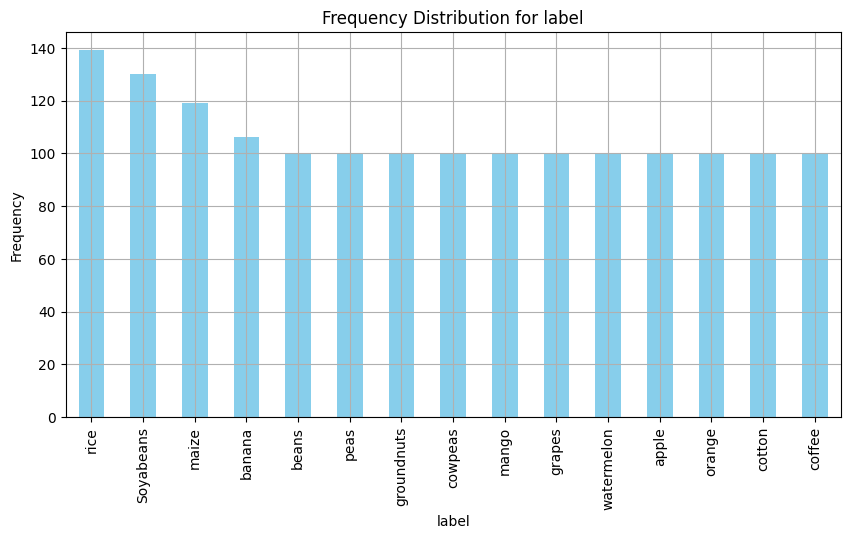

In [43]:
# Identify categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Display the frequency distribution for each categorical feature
for col in categorical_columns:
    frequency_distribution = data_cleaned[col].value_counts()
    print(f"Frequency distribution for '{col}':")
    print(frequency_distribution)
    print("\n")

    # Plotting the frequency distribution
    plt.figure(figsize=(10, 5))
    frequency_distribution.plot(kind='bar', color='skyblue')
    plt.title(f'Frequency Distribution for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


## Correlation and Relationships
10. **Are there any correlations between numerical features?**

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.283658 -0.229386    -0.011613  0.253276  0.131402   
P           -0.283658  1.000000  0.831588    -0.166375  0.050935 -0.239309   
K           -0.229386  0.831588  1.000000    -0.172540  0.217350 -0.148409   
temperature -0.011613 -0.166375 -0.172540     1.000000  0.184100 -0.123179   
humidity     0.253276  0.050935  0.217350     0.184100  1.000000 -0.018250   
ph           0.131402 -0.239309 -0.148409    -0.123179 -0.018250  1.000000   
rainfall     0.117543 -0.018800 -0.071137    -0.048843  0.002157 -0.106746   

             rainfall  
N            0.117543  
P           -0.018800  
K           -0.071137  
temperature -0.048843  
humidity     0.002157  
ph          -0.106746  
rainfall     1.000000  


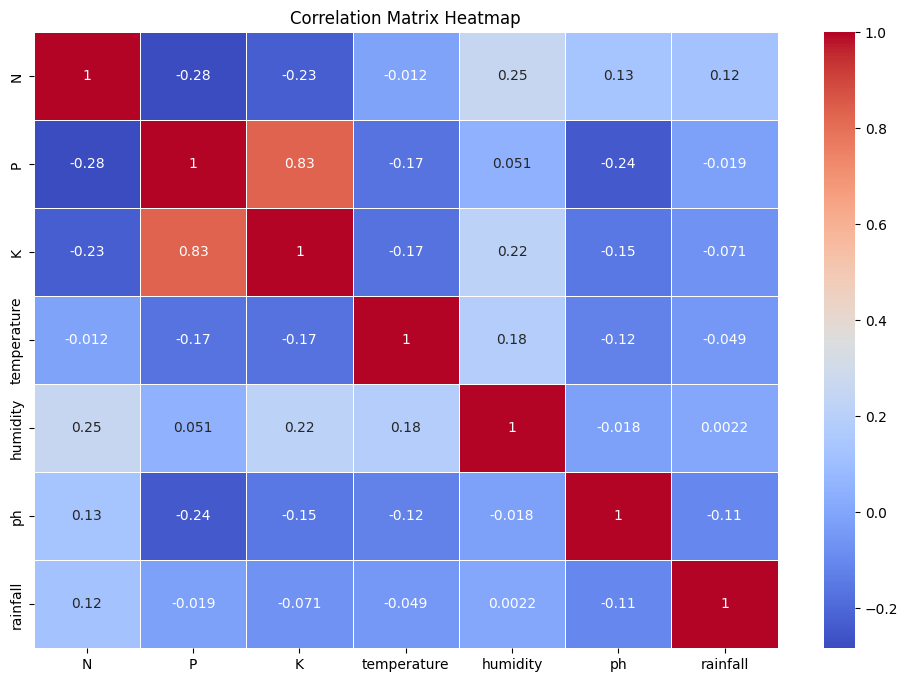

In [44]:
# Identify numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = data_cleaned[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


**11. How do different features correlate with the target variable?**
    

N              0.051229
P             -0.496538
K             -0.354760
temperature    0.251426
humidity       0.343856
ph            -0.047897
rainfall       0.114117
dtype: float64
Features with the highest correlation with the target variable:
P              0.496538
K              0.354760
humidity       0.343856
temperature    0.251426
rainfall       0.114117
N              0.051229
ph             0.047897
dtype: float64


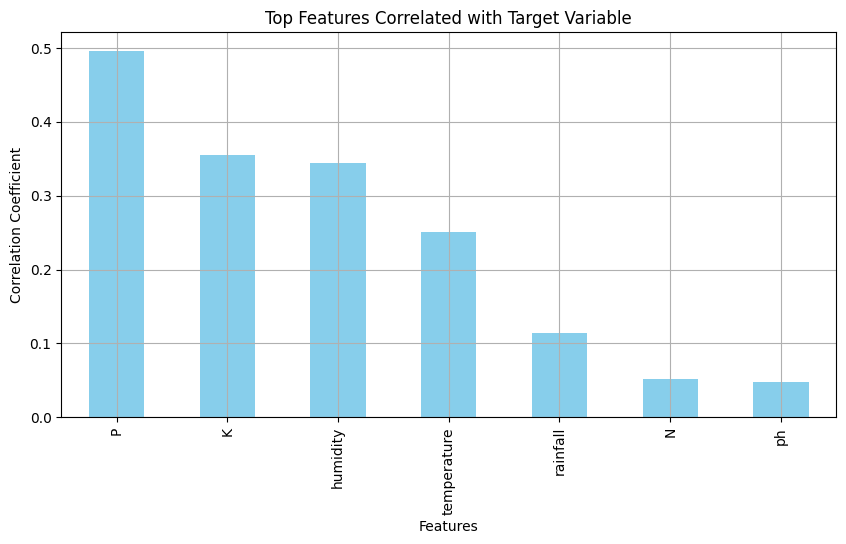

In [47]:
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

# Identify the target variable and numerical features
target_variable = 'label'
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
data_cleaned[target_variable] = label_encoder.fit_transform(data_cleaned[target_variable])

# Calculate correlations between numerical features and the target variable
correlations = data_cleaned[numerical_columns].corrwith(data_cleaned[target_variable])

# Display the correlation coefficients
print(correlations)

# Identify the features with the highest correlation with the target variable
strongest_correlations = correlations.abs().sort_values(ascending=False).head(10)
print("Features with the highest correlation with the target variable:")
print(strongest_correlations)

# Visualize the correlations using a bar plot
plt.figure(figsize=(10, 5))
strongest_correlations.plot(kind='bar', color='skyblue')
plt.title('Top Features Correlated with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()


## Outliers and Anomalies
**12. Are there any outliers in the numerical features?**
   

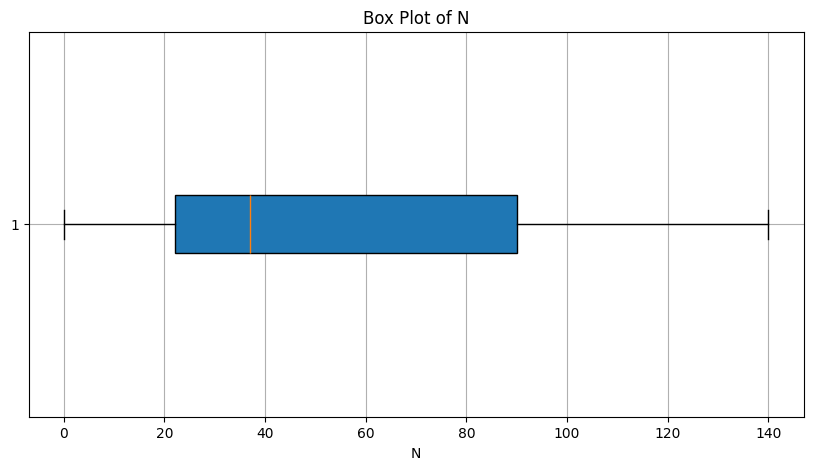

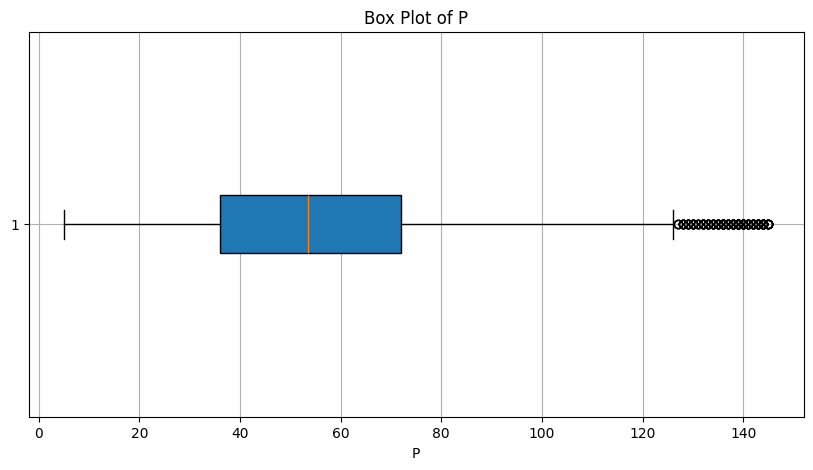

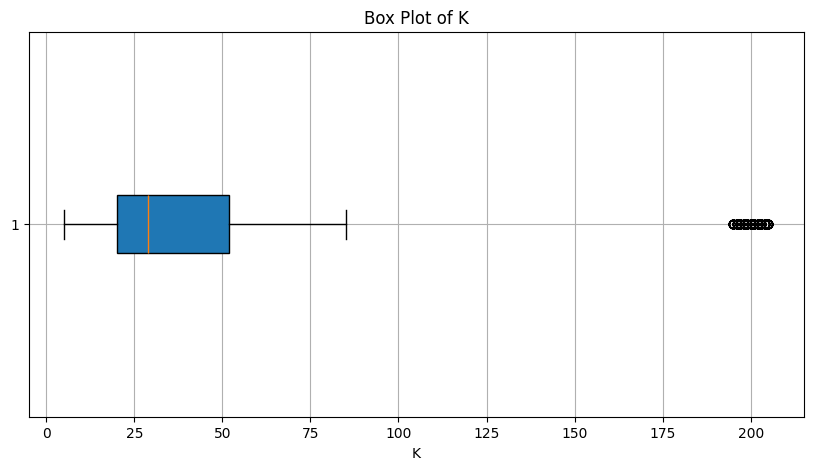

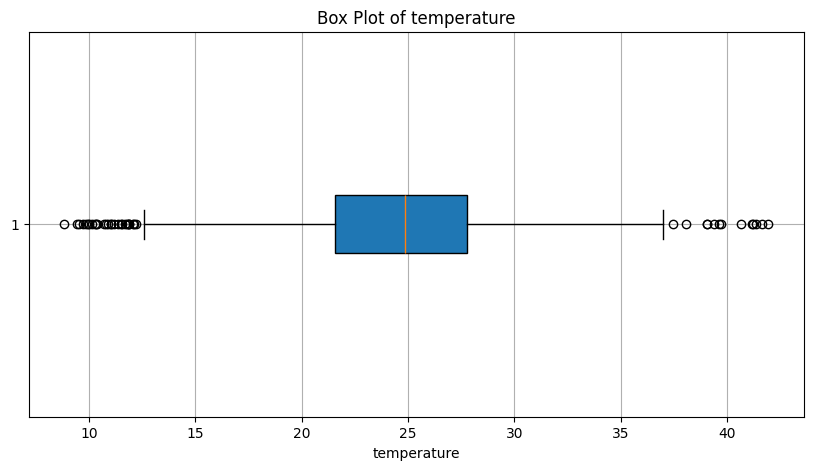

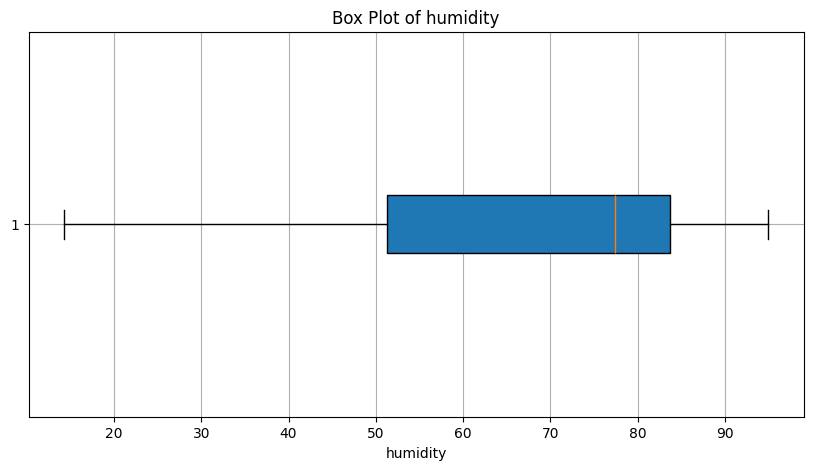

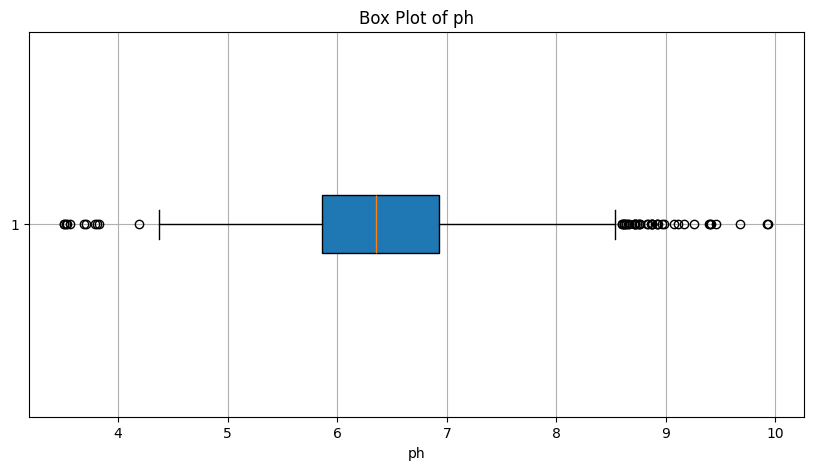

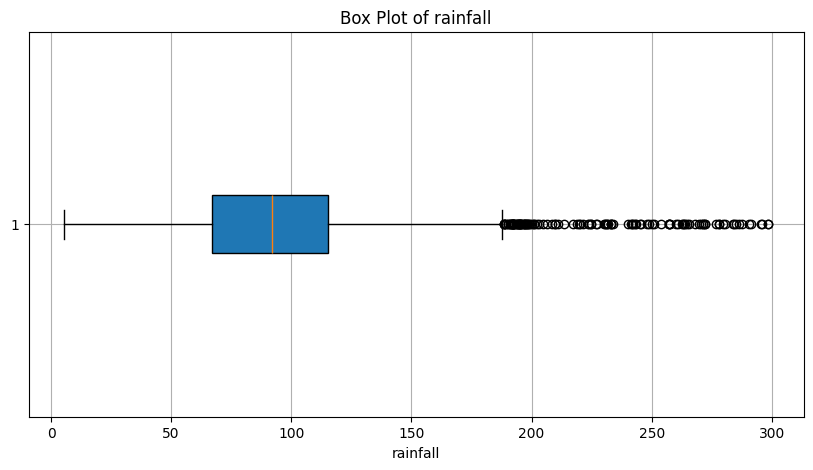

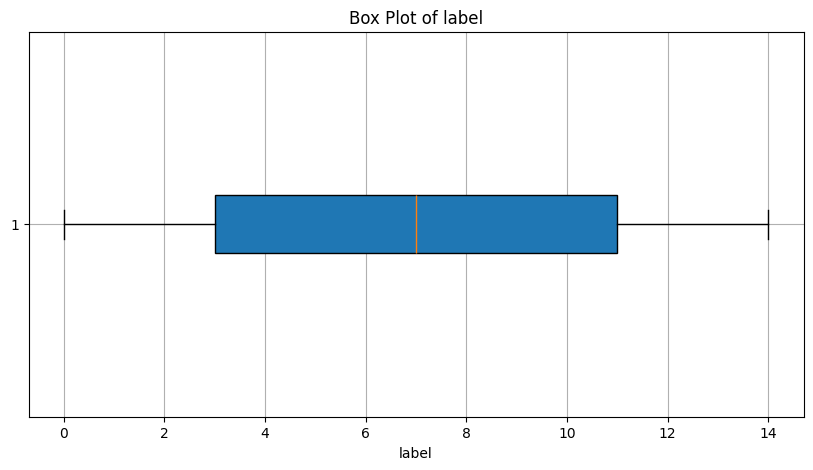

In [48]:
# Identify numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each numerical feature to detect outliers
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(data_cleaned[col], vert=False, patch_artist=True)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


**13. How do the outliers affect the distribution of numerical features?**
    

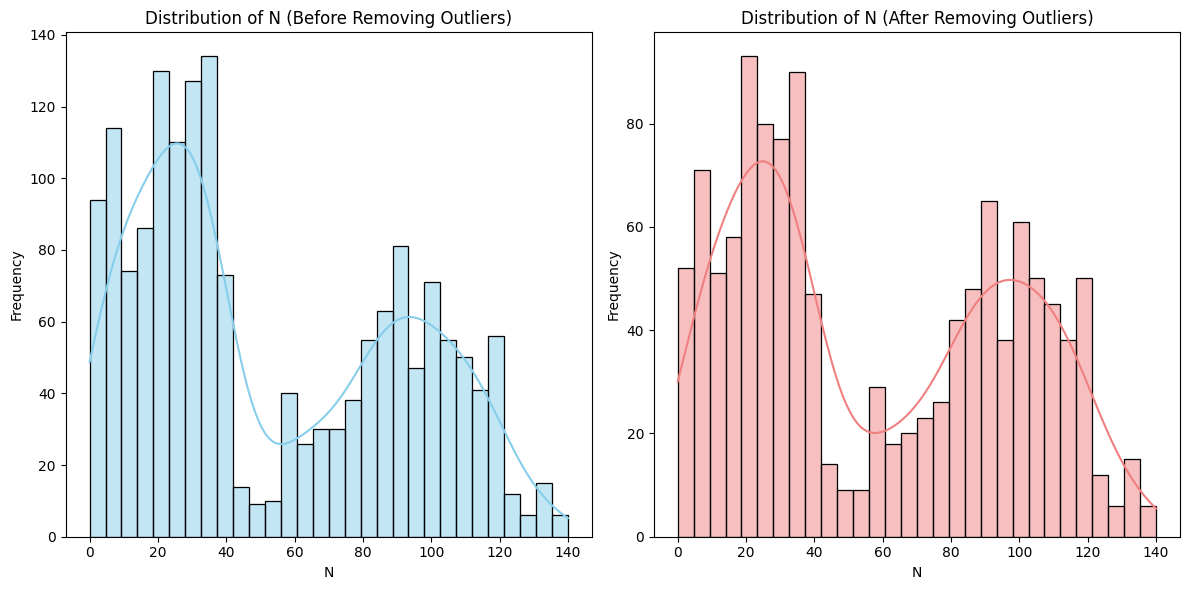

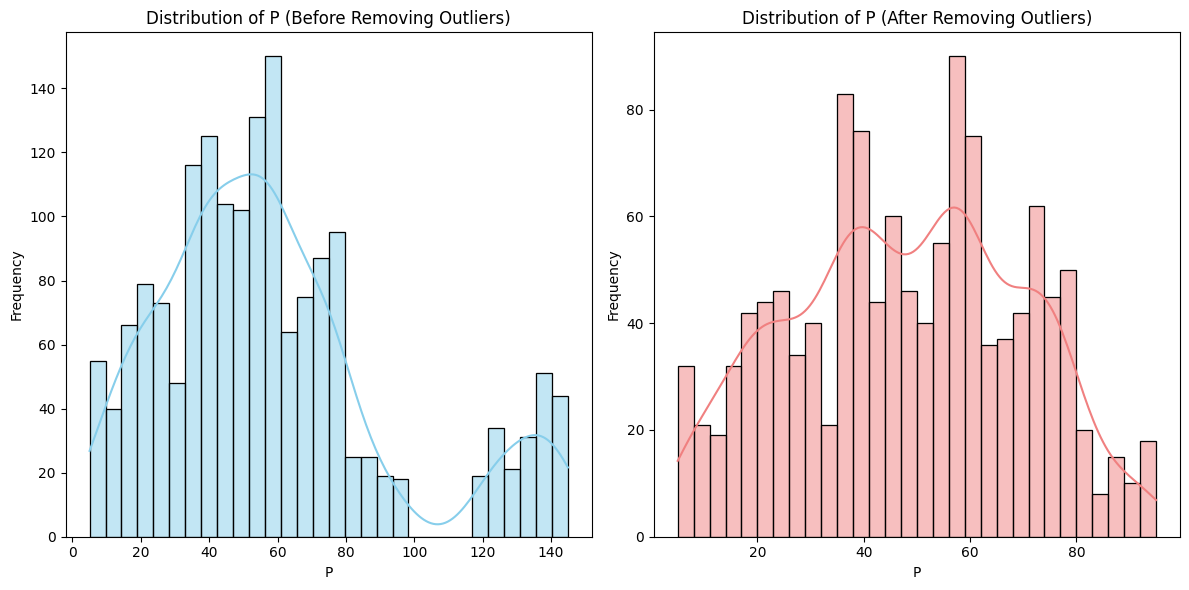

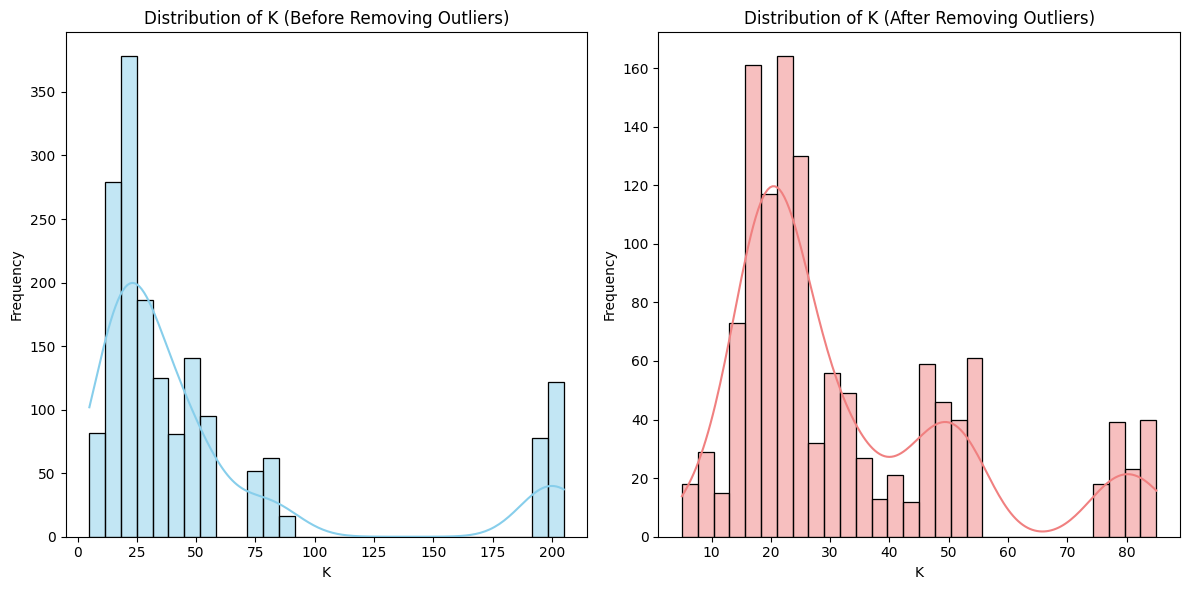

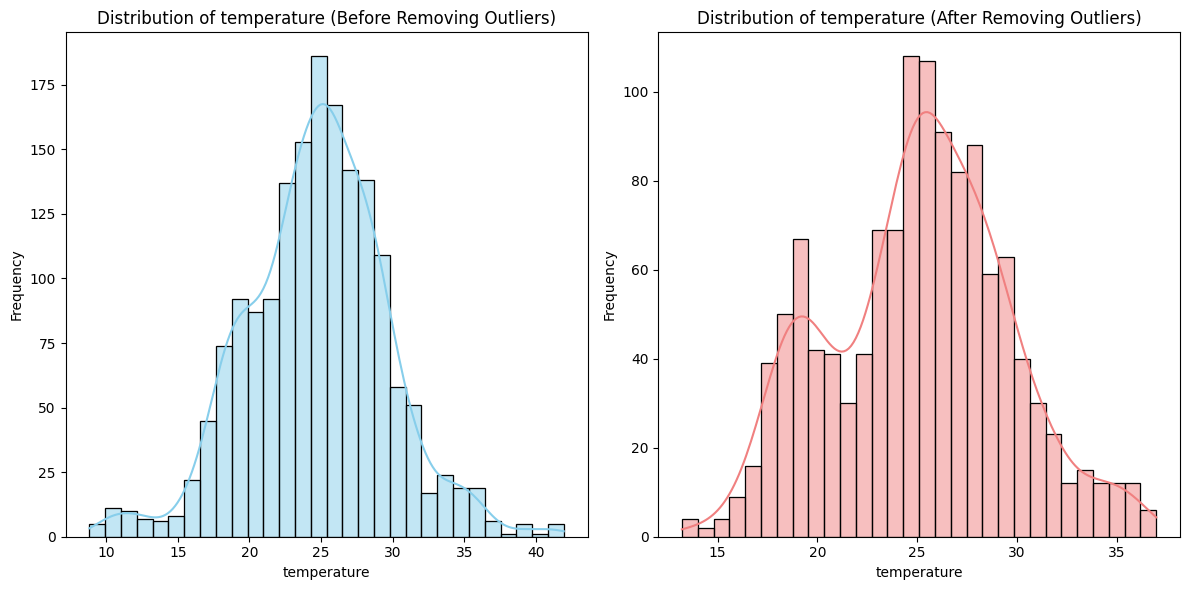

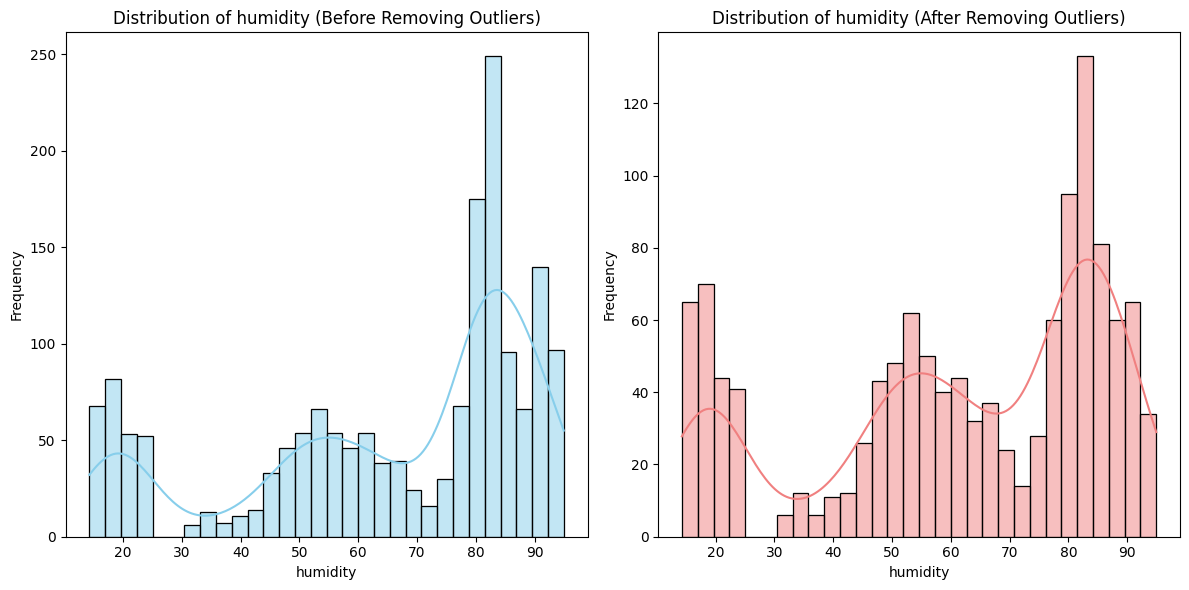

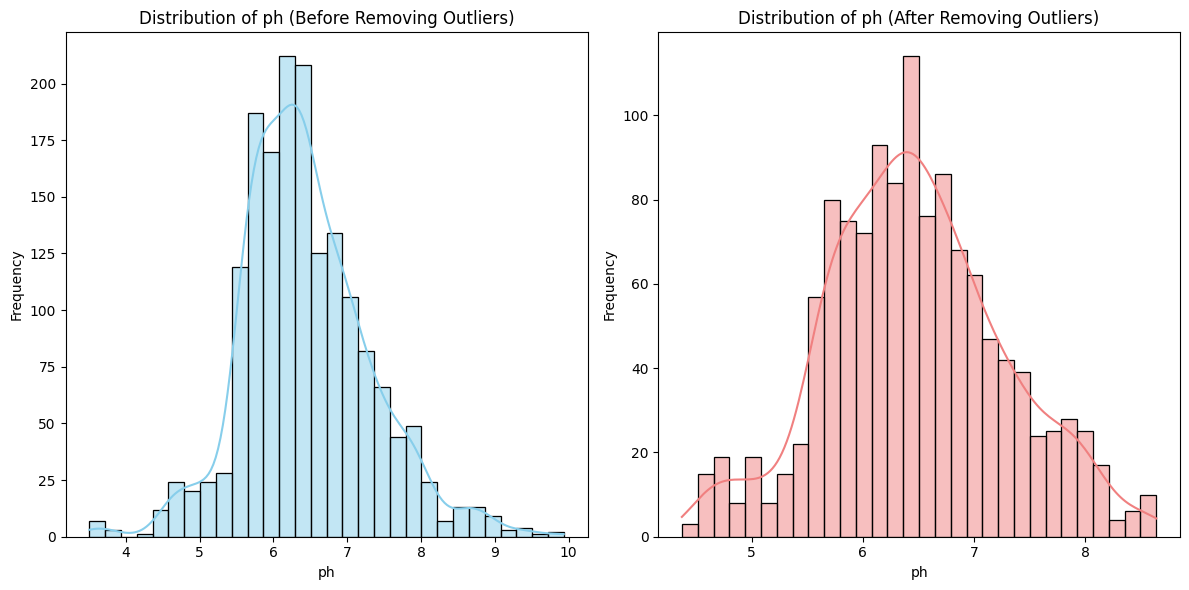

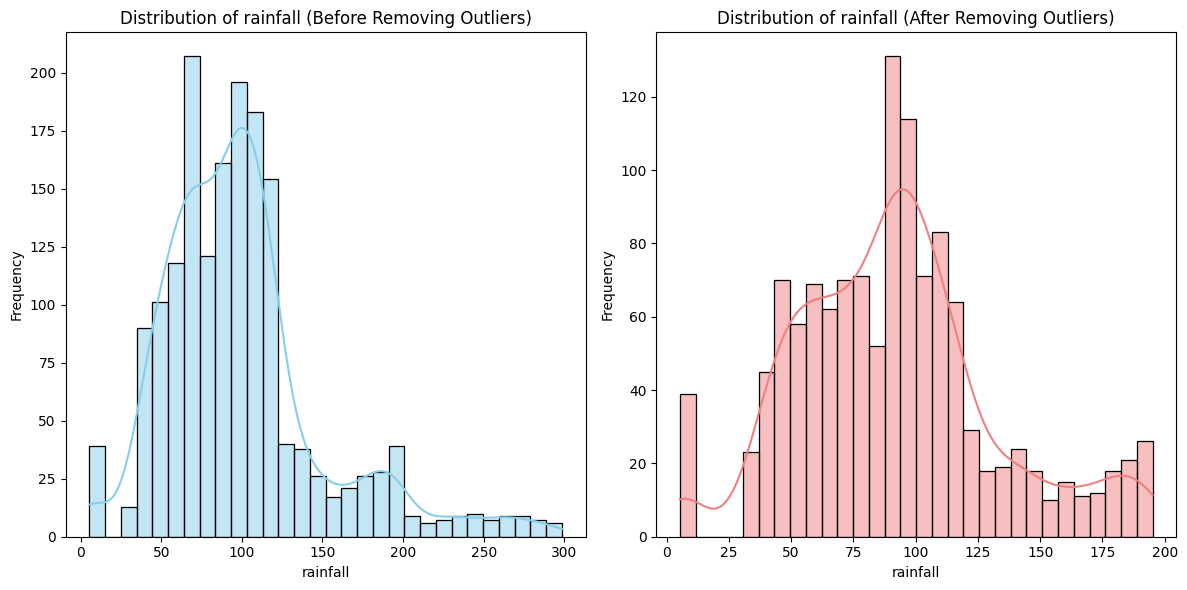

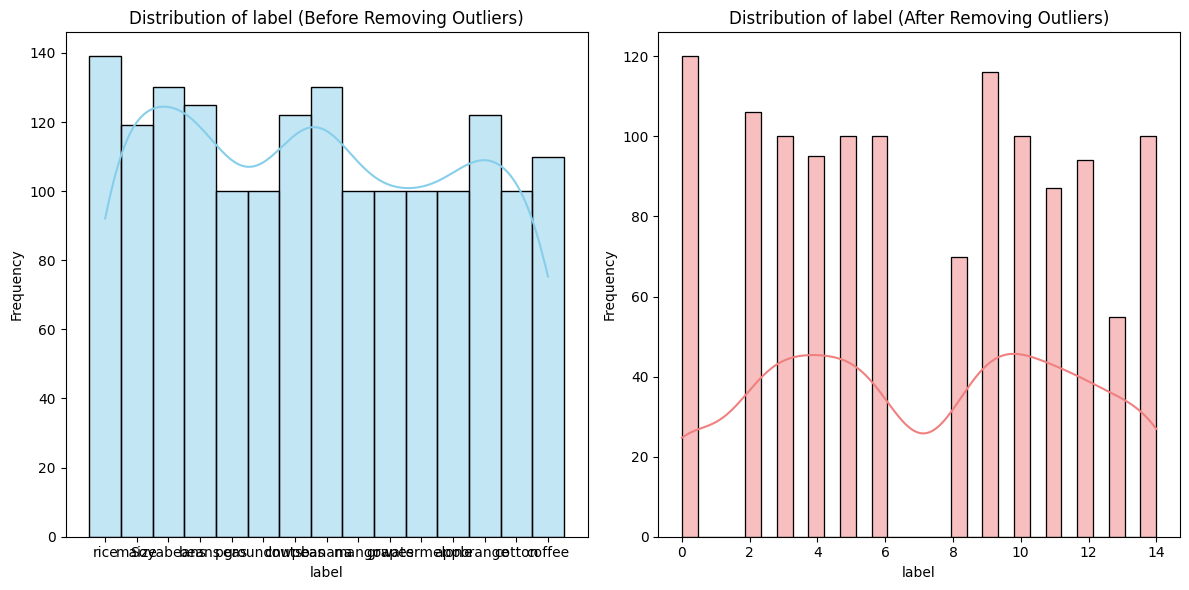

In [50]:
# Identify numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Create a new DataFrame without outliers
data_no_outliers = remove_outliers(data_cleaned.copy(), numerical_columns)

# Visualize the distributions before and after removing outliers
for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Before removing outliers
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col} (Before Removing Outliers)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # After removing outliers
    plt.subplot(1, 2, 2)
    sns.histplot(data_no_outliers[col], bins=30, kde=True, color='lightcoral')
    plt.title(f'Distribution of {col} (After Removing Outliers)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


### Class-Specific Analysis
**14. What is the distribution of the target variable (class labels)?**
   

Class Distribution:
label
0     120
9     116
2     106
3     100
6     100
10    100
14    100
5     100
4      95
12     94
11     87
8      70
13     55
Name: count, dtype: int64


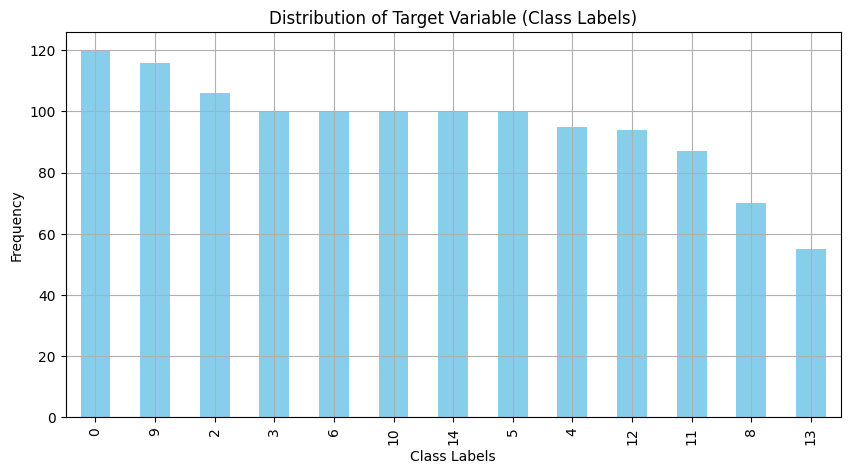

In [51]:
# Identify the target variable
target_variable = 'label'

# Calculate the distribution of the target variable
class_distribution = data_no_outliers[target_variable].value_counts()

# Display the distribution of the target variable
print(f"Class Distribution:\n{class_distribution}")

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 5))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Variable (Class Labels)')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**15. How do different features contribute to different classes?**
   

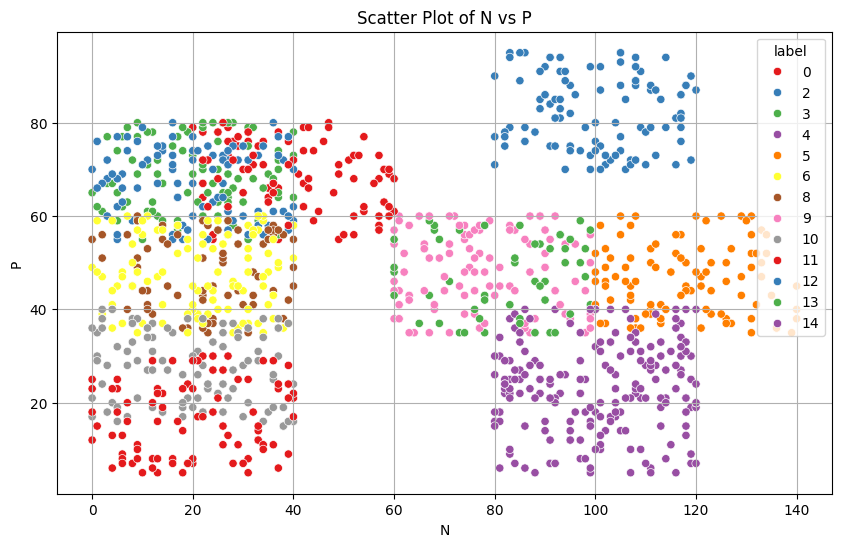

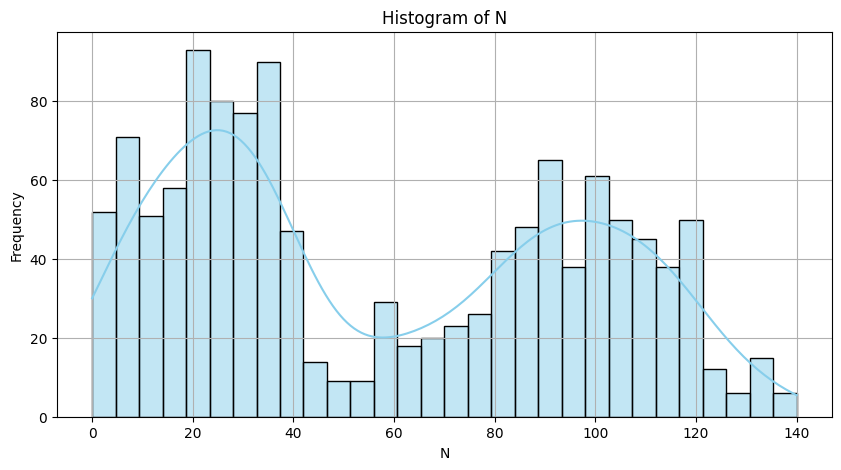

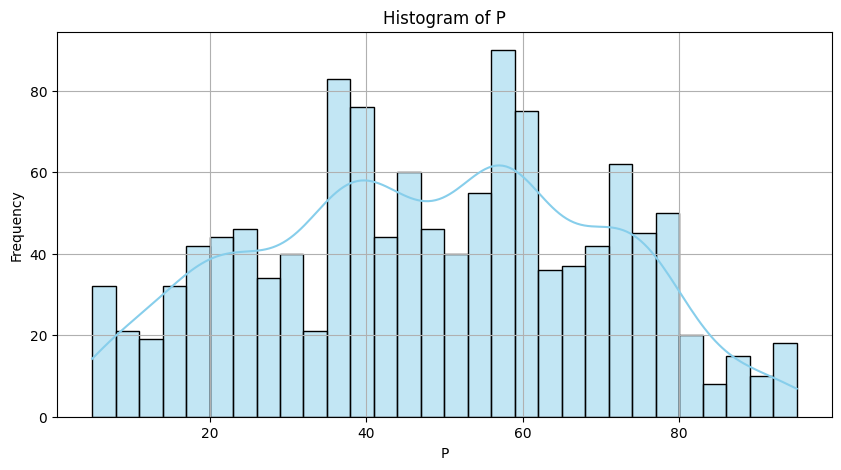

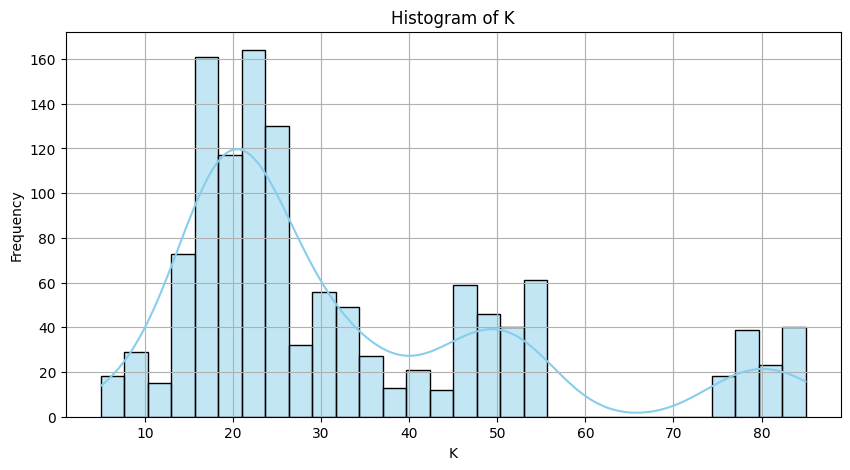

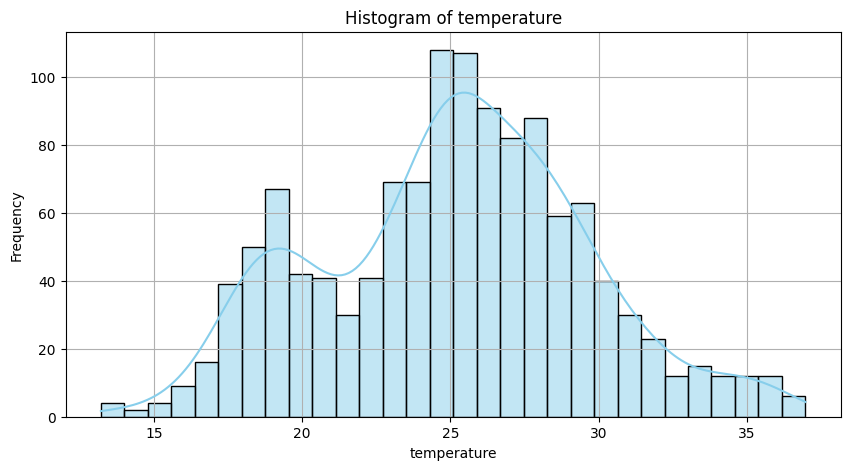

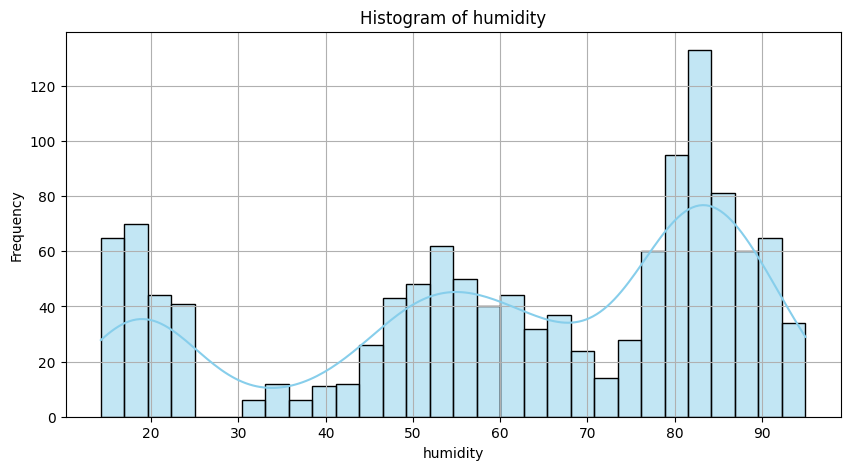

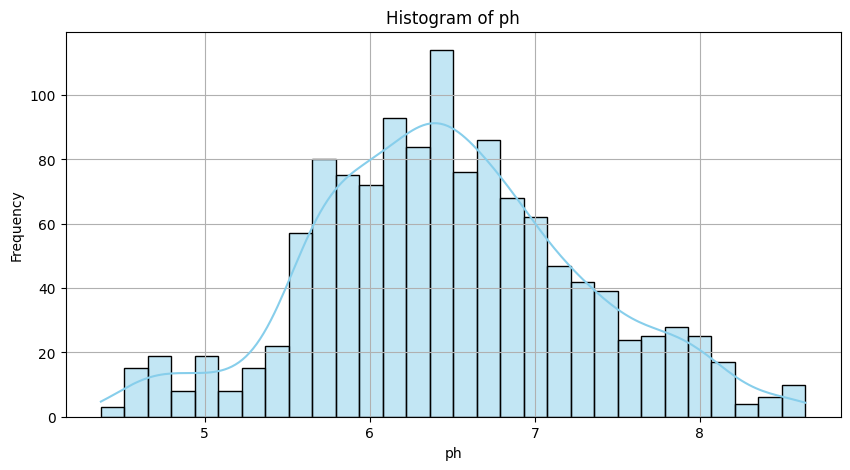

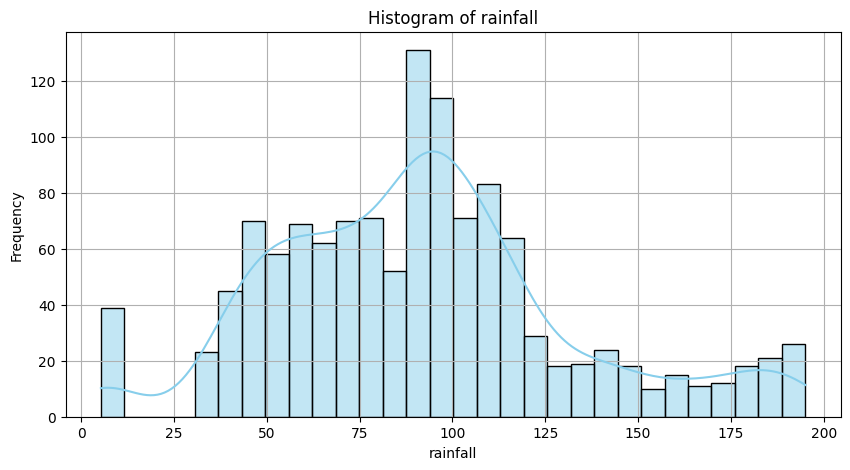

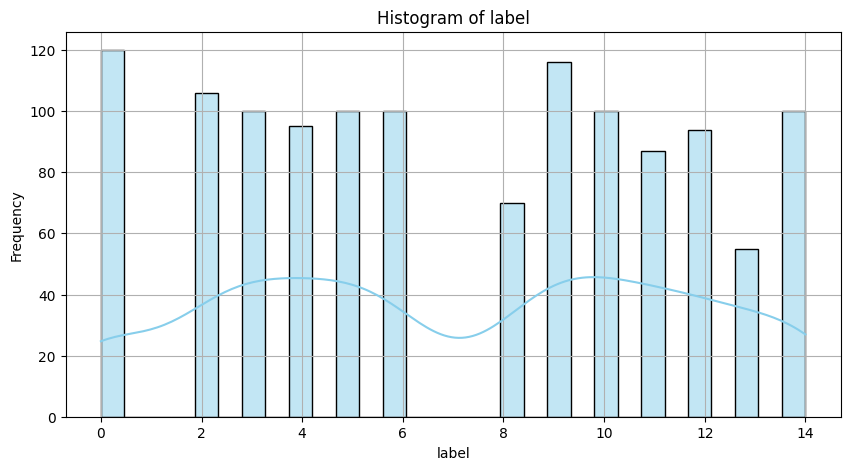

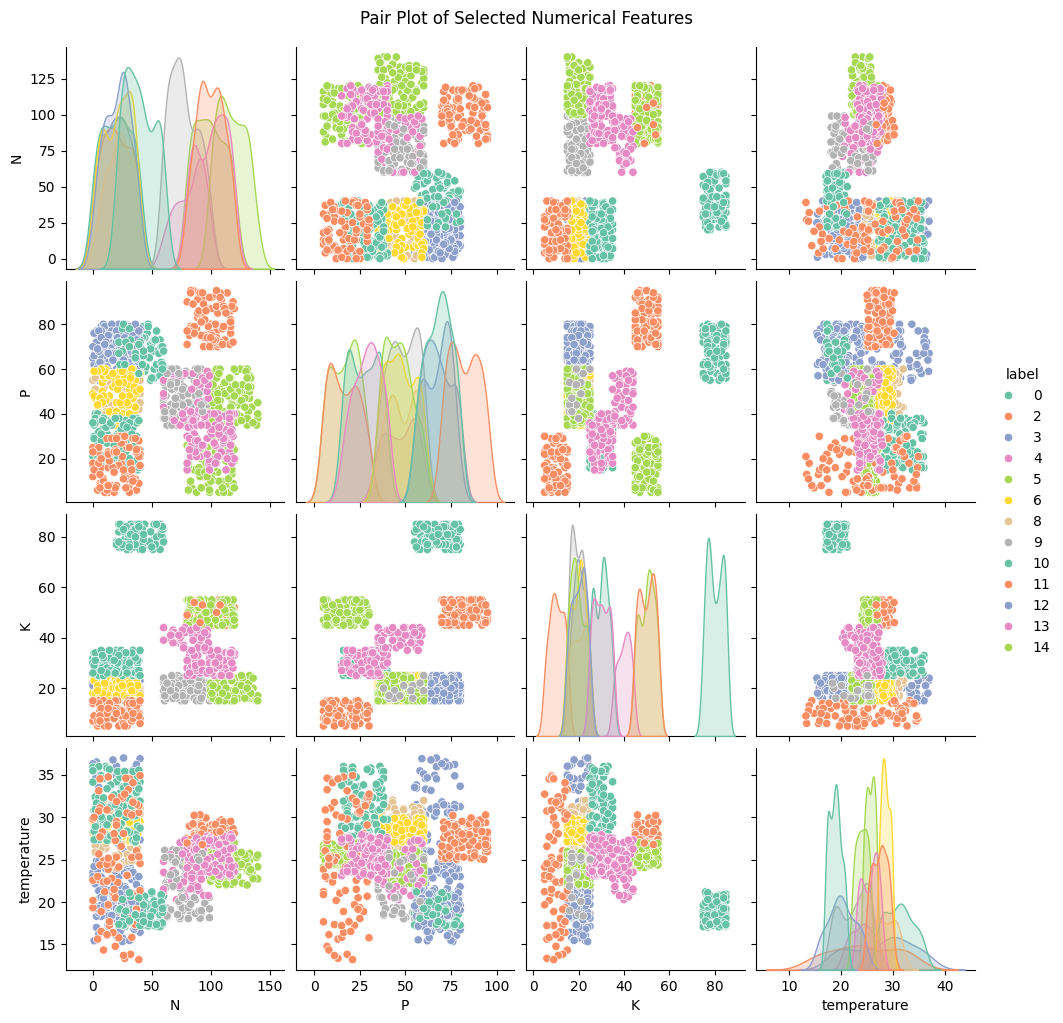

In [54]:
# Identify numerical columns and the class column
class_column = 'label'
numerical_columns = data_no_outliers.select_dtypes(include=['float64', 'int64']).columns

# Scatter plot for the first two numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_no_outliers[numerical_columns[0]], y=data_no_outliers[numerical_columns[1]], hue=data_no_outliers[class_column], palette='Set1')
plt.title(f'Scatter Plot of {numerical_columns[0]} vs {numerical_columns[1]}')
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.grid(True)
plt.show()

# Histograms for numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data_no_outliers[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Pair plot for a subset of numerical features
sns.pairplot(data_no_outliers[numerical_columns[:4]].join(data_no_outliers[class_column]), hue=class_column, palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()


## Advanced Analysis
**17. What are the principal components of the dataset?**
    

Explained variance by each principal component: [0.28331853 0.21733728]


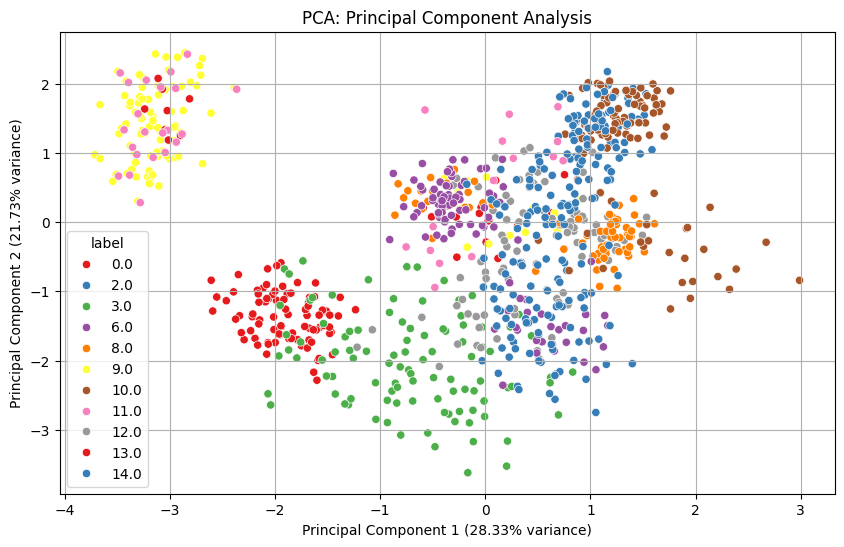

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Identify numerical columns (excluding the target variable)
target_variable = 'label'
numerical_columns = data_no_outliers.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col != target_variable]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_no_outliers[numerical_columns])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the target variable to the PCA DataFrame
pca_df[target_variable] = data_no_outliers[target_variable]

# Display the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

# Plot the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=target_variable, data=pca_df, palette='Set1')
plt.title('PCA: Principal Component Analysis')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.grid(True)
plt.show()


**18. Can clustering help identify patterns in the data?**
    

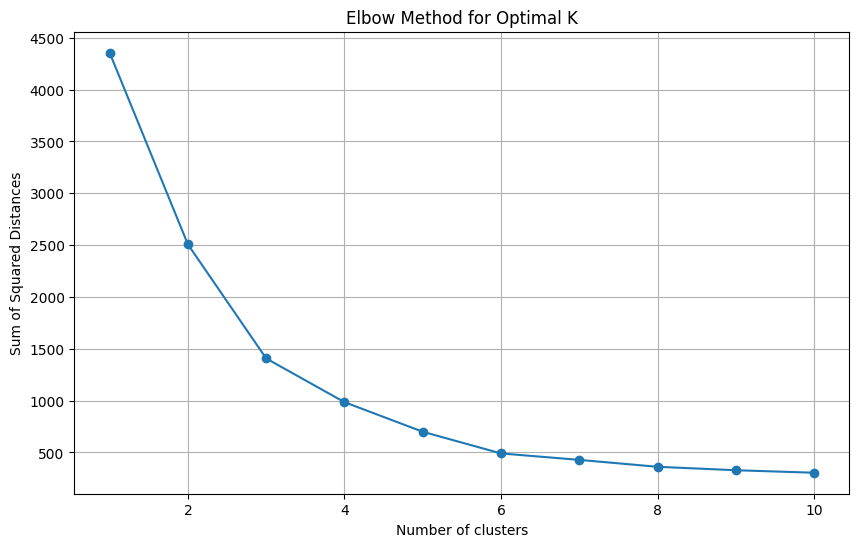

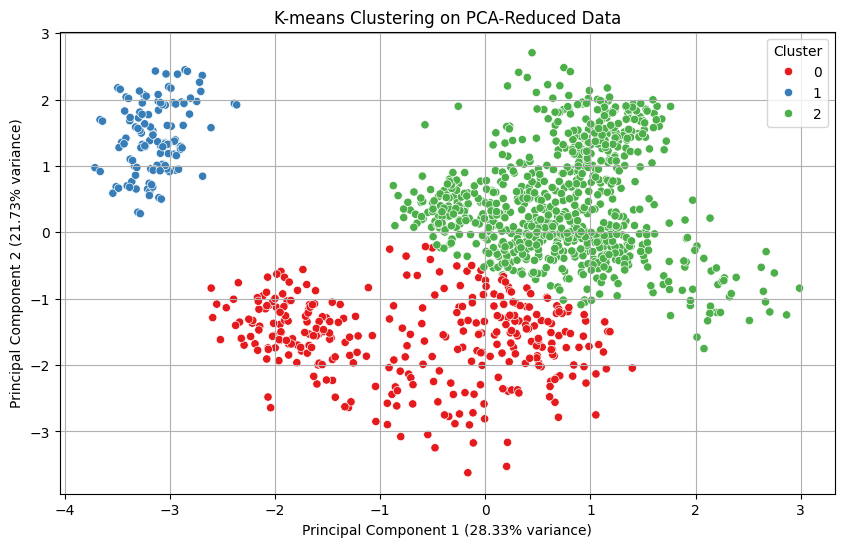

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Identify numerical columns (excluding the target variable)
numerical_columns = data_no_outliers.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col != 'label']

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_no_outliers[numerical_columns])

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_pca)

# Add the cluster labels to the PCA DataFrame
pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=pca_df, legend='full')
plt.title('K-means Clustering on PCA-Reduced Data')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True)
plt.show()
